In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-1million-tracks/spotify_data.csv


In [ ]:
#I'll be updating the file later - with comments and explanations

In [2]:
#importing necessary libraries and packages
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#loading the spotify 1 million songs data set
spotify_tracks = pd.read_csv('/kaggle/input/spotify-1million-tracks/spotify_data.csv')

In [5]:
#getting a overview of dataset
spotify_tracks.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [6]:
#getting information about data types in dataset
spotify_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [7]:
#statistical overview of data
spotify_tracks.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

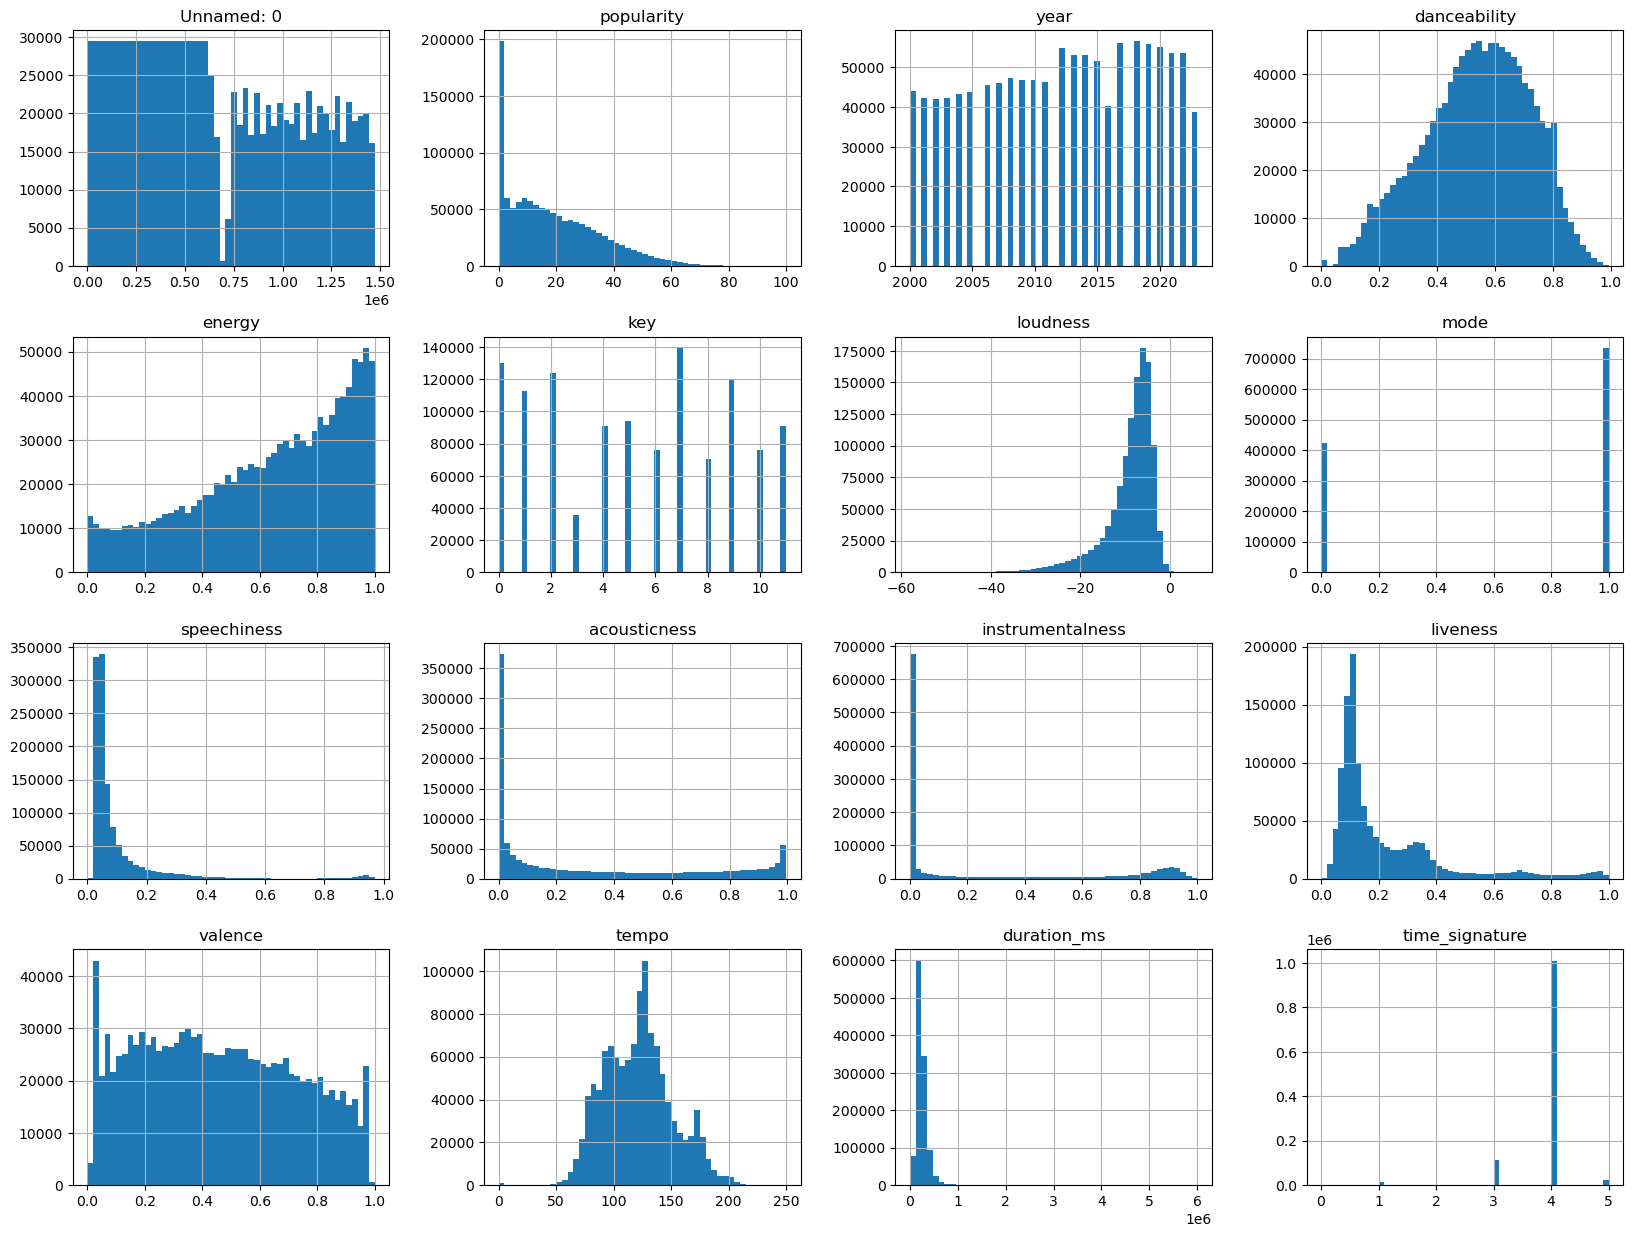

In [10]:
#plotting histogram for all the columns/features of data
spotify_tracks.hist(bins=50, figsize=(20, 15))

In [12]:
#adding a new column in data set duration_mins by diving duration_ms (duration milliseconds) by 60000
spotify_tracks['duration_mins'] = spotify_tracks['duration_ms'] / 60000

In [13]:
#overview of new column
spotify_tracks['duration_mins']

0          4.002767
1          3.606450
2          2.649333
3          5.071550
4          4.072000
             ...   
1159759    5.733550
1159760    4.751117
1159761    3.570883
1159762    3.985550
1159763    3.537117
Name: duration_mins, Length: 1159764, dtype: float64

In [14]:
#dropping the columns we don't need
spotify_tracks = spotify_tracks.drop(['track_id', 'duration_ms'], axis=1)

In [15]:
#overview of data after dropping and adding of columns
spotify_tracks.head()

,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3,4.002767
1,1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,3.606450
2,2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4,2.649333
3,3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4,5.071550
4,4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4,4.072000


In [16]:
#creating a new dataframe with features with numeric values
attributes = spotify_tracks[['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_mins']]

In [17]:
#correlation of all the features
corr_matrix = attributes.corr()

corr_matrix['popularity'].sort_values(ascending=False)

popularity          1.000000
year                0.345821
loudness            0.104097
danceability        0.098533
time_signature      0.030830
energy              0.009401
tempo               0.002566
key                 0.000390
valence            -0.018070
mode               -0.023837
speechiness        -0.024700
liveness           -0.056968
acousticness       -0.059181
duration_mins      -0.118484
instrumentalness   -0.152893
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

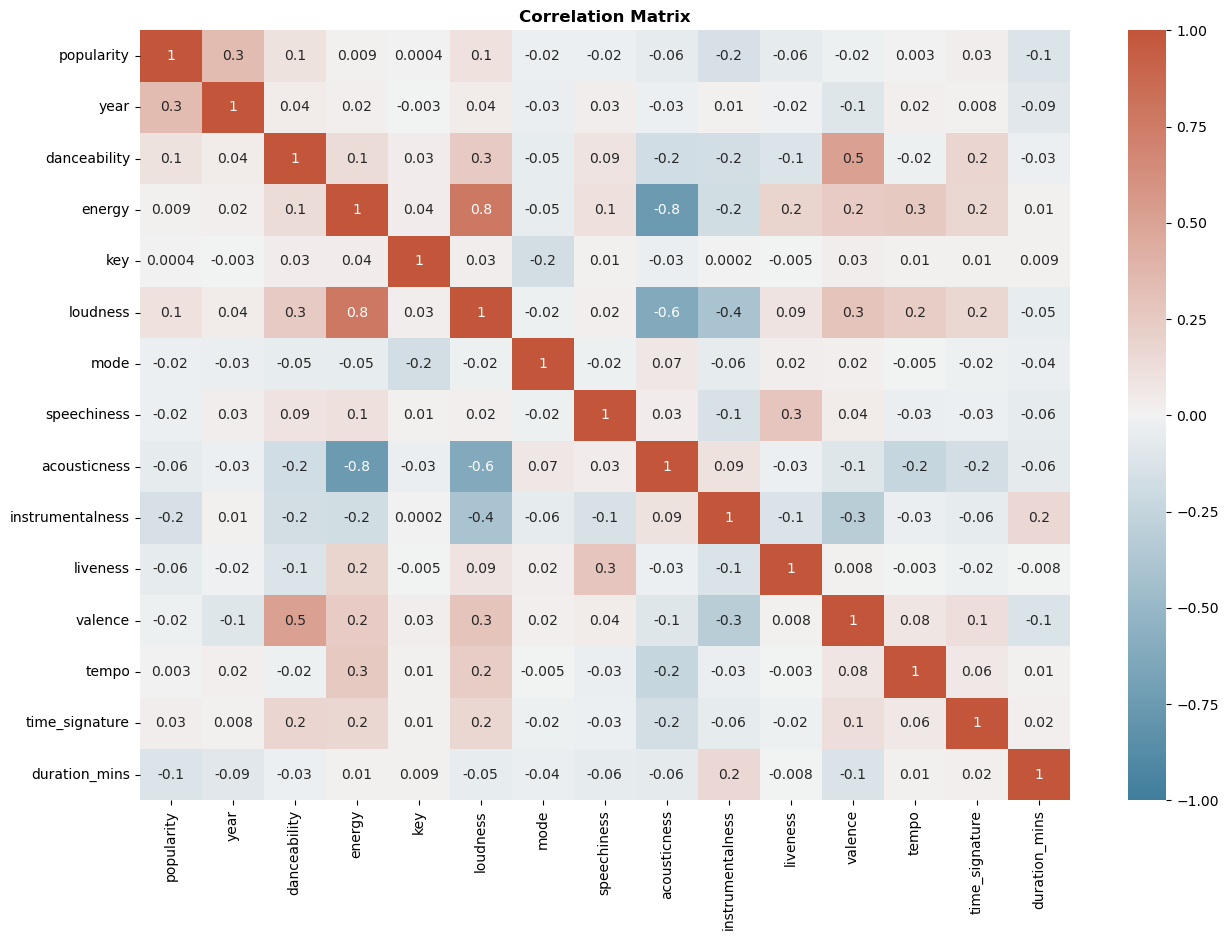

In [18]:
#plotting correlation heatmap using seaborn
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(attributes.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

In [19]:
#identifying highly correlated pairs
corr_matrix = attributes.corr()
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)


negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 danceability  valence         0.519900
energy        loudness        0.781006
loudness      energy          0.781006
valence       danceability    0.519900
dtype: float64

Less Correlated Pairs: 
 energy        acousticness   -0.752662
loudness      acousticness   -0.621698
acousticness  energy         -0.752662
              loudness       -0.621698
dtype: float64


In [20]:
#setting ratings based on popularity score - popularity score 0 - 50 = Low, score = 51 - 100 = Popular
popularity_verdict = spotify_tracks.copy()
popularity_verdict['verdict'] = ''

for i, row in popularity_verdict.iterrows():
    score = 'low'
    if row.popularity >= 50:
        score = 'popular'
    popularity_verdict.at[i, 'verdict'] = score
    

In [21]:
#getting sense of new dataframe by looking at few columns
popularity_verdict[['artist_name', 'track_name', 'popularity', 'verdict']].head()

,artist_name,track_name,popularity,verdict
0,Jason Mraz,I Won't Give Up,68,popular
1,Jason Mraz,93 Million Miles,50,popular
2,Joshua Hyslop,Do Not Let Me Go,57,popular
3,Boyce Avenue,Fast Car,58,popular
4,Andrew Belle,Sky's Still Blue,54,popular


In [22]:
#counting popularity score values
popularity_verdict[['popularity']].value_counts()

popularity
0             158391
1              39820
2              31247
8              30322
9              29249
               ...  
93                 3
94                 1
95                 1
96                 1
100                1
Length: 98, dtype: int64

In [23]:
#printing number of songs with popularity score = 0
print('Number of songs with 0 as popularity value: ', len(popularity_verdict[popularity_verdict.popularity == 0]))


Number of songs with 0 as popularity value:  158391


In [24]:
#printing percentage of songs with 0 popularity score
print('Percent of data with a popularity of 0: {0:.2f}%'.format\
      (len(popularity_verdict[popularity_verdict.popularity == 0]) / len(popularity_verdict) * 100))

Percent of data with a popularity of 0: 13.66%


In [25]:
#sorting the data based on descending popularity
popularity_verdict = popularity_verdict.sort_values('popularity', ascending=False).reset_index()

In [26]:
#last 5 records
popularity_verdict.tail()

,index,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins,verdict
1159759,1035032,1279261,Starkey,OK Luv (Dev79 Remix),0,2009,dubstep,0.801,0.413,6,...,1,0.2160,0.043700,0.000,0.1250,0.708,137.010,4,4.348217,low
1159760,1035033,1279262,Saleem Razvi,Wonderful Thing,0,2009,dubstep,0.653,0.963,11,...,0,0.0590,0.000126,0.723,0.0380,0.690,132.017,4,6.628567,low
1159761,1035034,1279263,Saleem Razvi,Spanish Fly,0,2009,dubstep,0.768,0.720,1,...,1,0.0720,0.000911,0.942,0.1160,0.137,134.993,4,6.198517,low
1159762,1035035,1279264,Saleem Razvi,Feel Alive - Feat. Mina - Original,0,2009,dubstep,0.724,0.549,7,...,1,0.0388,0.000124,0.840,0.1320,0.114,128.003,4,5.755650,low
1159763,646680,653268,Maurice,Feline - Original Mix Radio Edit,0,2000,house,0.523,0.983,10,...,0,0.0656,0.000033,0.932,0.0486,0.781,133.952,4,3.319783,low


In [27]:
#as almost 15% of entries have 0 popularity score, we drop the records with 0 popularity score as this will help
#model in predicting better. 0 value records will not have significance in our analysis.
popularity_verdict = popularity_verdict[popularity_verdict.popularity > 0]

#last 5 records with popularity score = 1, hence records with popularity score = 0 are dropped
popularity_verdict.tail()

,index,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins,verdict
1001368,101623,101623,Brian D'Arcy James,Act One Finale,1,2013,show-tunes,0.475,0.346,9,...,0,0.0728,0.63200,0.000024,0.0670,0.405,129.375,4,2.121333,low
1001369,643737,648246,Novo Som,Meu Sonho (Playback),1,2000,groove,0.611,0.489,0,...,1,0.0286,0.02820,0.049300,0.1300,0.157,142.003,4,4.604517,low
1001370,315324,315324,Quadrat Beat,Hey Yeah,1,2018,breakbeat,0.751,0.901,0,...,1,0.0548,0.00689,0.749000,0.0485,0.691,132.985,4,4.421217,low
1001371,873947,1039671,Billo's,Mayba,1,2005,salsa,0.565,0.265,7,...,0,0.0365,0.96000,0.004820,0.0924,0.522,118.803,4,3.619783,low
1001372,316476,316476,Louie Vega,Love Having You Around (feat. Rochelle Fleming...,1,2018,chicago-house,0.778,0.802,1,...,1,0.0354,0.00455,0.000040,0.7190,0.564,125.987,4,8.999217,low


Text(0.5, 1.0, 'Popularity Score Distribution')

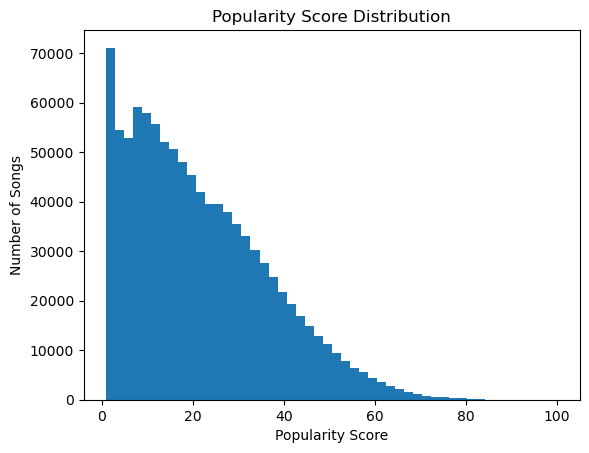

In [28]:
#plotting histogram for popularity score distribution
popularity_verdict['popularity'].plot(kind='hist', bins=50)
plt.xlabel('Popularity Score')
plt.ylabel('Number of Songs')
plt.title('Popularity Score Distribution')


<Axes: xlabel='popularity', ylabel='loudness'>

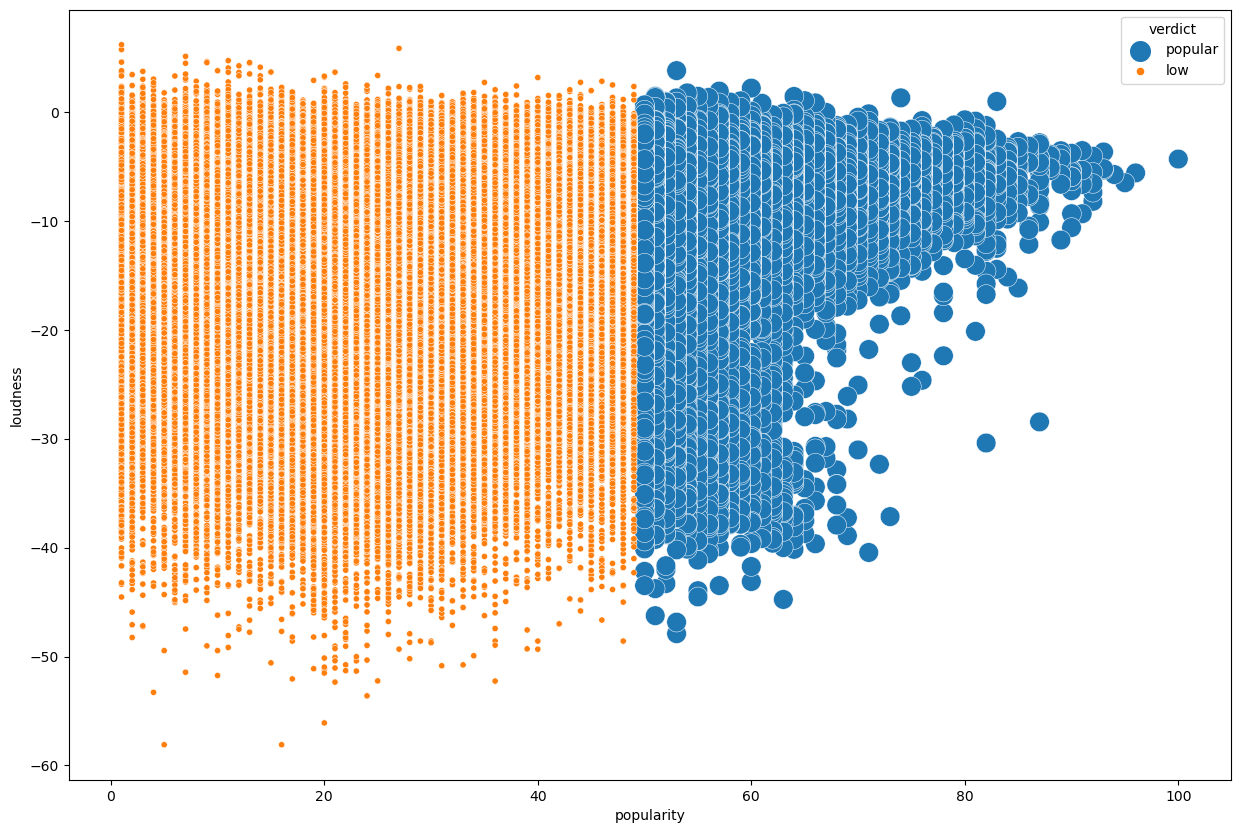

In [29]:
#popularity vs loudness scatterplot
fig, ax = plt.subplots(figsize= (15, 10))
sns.scatterplot(data = popularity_verdict, x = 'popularity', y = 'loudness', hue = 'verdict', size = 'verdict', sizes = (20, 200), legend = 'full')

<Axes: xlabel='popularity', ylabel='danceability'>

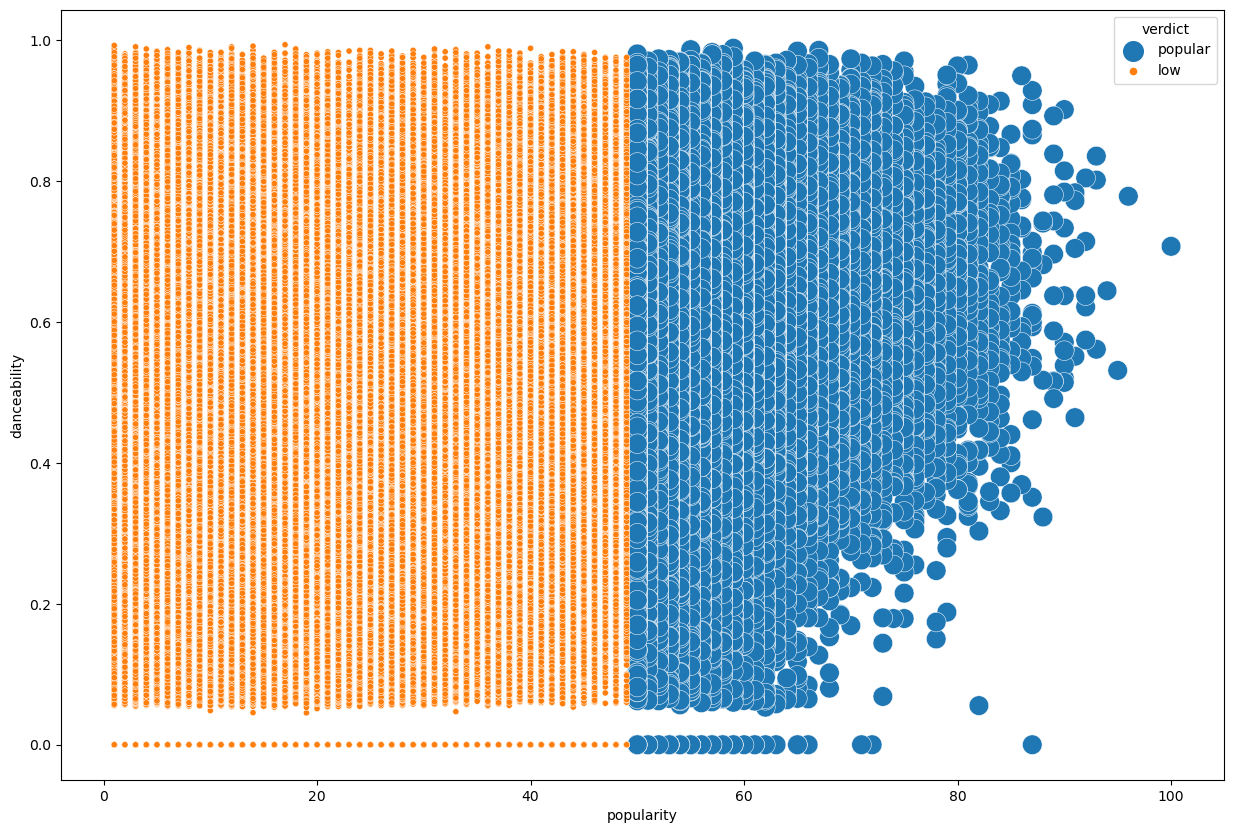

In [30]:
#popularity vs danceability scatter plot
fig, ax = plt.subplots(figsize= (15, 10))
sns.scatterplot(data = popularity_verdict, x = 'popularity', y = 'danceability', hue = 'verdict', size = 'verdict', sizes = (20, 200), legend = 'full')

In [31]:
pop_ver_att = popularity_verdict[['year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_mins']]

In [32]:
#defining x and y df for our analysis
X = pop_ver_att.select_dtypes(include='number')
y = popularity_verdict['verdict']

In [33]:
X.head()

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,2023,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,4,3.340917
1,2023,0.778,0.632,2,-5.600,0,0.0493,0.2740,0.000000,0.0915,0.498,122.104,4,3.638150
2,2023,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,4,3.880950
3,2022,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,4,2.565783
4,2022,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,4,2.710633


In [34]:
y.head()

0    popular
1    popular
2    popular
3    popular
4    popular
Name: verdict, dtype: object

In [36]:
#getting ready for ml using Sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)


Logistic Regression

In [37]:
#importing necessary libraries to perform logistic regression
from sklearn import datasets, linear_model, metrics

log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 1000)

#train the model using training set
log_reg.fit(X_train, y_train)

#making predictions on the testing set
y_pred = log_reg.predict(X_test)

#printing accuracy of algorithm
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)




Logistic Regression Model Accuracy (in %): 94.72324674114216


In [40]:
#importing confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

#printing confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[284550      5]
 [ 15847     10]]
              precision    recall  f1-score   support

         low       0.95      1.00      0.97    284555
     popular       0.67      0.00      0.00     15857

    accuracy                           0.95    300412
   macro avg       0.81      0.50      0.49    300412
weighted avg       0.93      0.95      0.92    300412



**K Nearest Neighbors**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

#printing confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[270625  13930]
 [ 13116   2741]]
              precision    recall  f1-score   support

         low       0.95      0.95      0.95    284555
     popular       0.16      0.17      0.17     15857

    accuracy                           0.91    300412
   macro avg       0.56      0.56      0.56    300412
weighted avg       0.91      0.91      0.91    300412



In [42]:
#printing accuracy of algorithm
print("KNN Model Accuracy (in %):",
metrics.accuracy_score(y_test, pred) * 100)

KNN Model Accuracy (in %): 90.9970307444443


**Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators = 100)

rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

#printing confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[284333    222]
 [ 15549    308]]
              precision    recall  f1-score   support

         low       0.95      1.00      0.97    284555
     popular       0.58      0.02      0.04     15857

    accuracy                           0.95    300412
   macro avg       0.76      0.51      0.51    300412
weighted avg       0.93      0.95      0.92    300412



In [44]:
#printing accuracy of algorithm
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Random Forest Model Accuracy (in %): 94.75020971199552


**Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(random_state=42, max_depth=2)

d_tree.fit(X_train, y_train)

y_pred = d_tree.predict(X_test)

In [46]:
#printing confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[284555      0]
 [ 15857      0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         low       0.95      1.00      0.97    284555
     popular       0.00      0.00      0.00     15857

    accuracy                           0.95    300412
   macro avg       0.47      0.50      0.49    300412
weighted avg       0.90      0.95      0.92    300412



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#printing accuracy of algorithm
print("Decsision Tree Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Decsision Tree Model Accuracy (in %): 94.72158236022528
